In [1]:
import choix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# we will create this dataset from the data in 'data/similarity/single-choice-data.csv'

In [3]:
dataset = 'originally-single-choice-data'
filename = '../../data/similarity/'+dataset+'.csv'
df = pd.read_csv(filename)
df.head()

,reference,selected,rest_0,rest_1,rest_2,rest_3,rest_4,rest_5,rest_6,rest_7,rest_8,rest_9,rest_10,rest_11,rest_12,rest_13,rest_14
0,images/13e60bef87794072bb613abcd61ba94d.jpg,images/9d7d0a0057234bebbf0184080747dca9.jpg,images/effd4fa388ae4f128692dc71641236b6.jpg,images/db3e0c1c7e394786b60024a27709d72d.jpg,images/a4ed300c0a094f7b9ec42459ffbbcc81.jpg,images/ff30bec2aac74aa6a62e86e163f26110.jpg,images/2938220c73d74f188a3ea85d250a5fda.jpg,images/27666b1933974c48af19b59ffbf3ab85.jpg,images/c6aa858ae39b476696256d92fdf0555f.jpg,images/ca205931926143f0b0f4151971c58223.jpg,images/871612f7c2fb439fabc43307fbb257e3.jpg,images/4555f1f51a5a47a7918dc67051290665.jpg,images/89d550f0bd6a43638b4a0c85dcad644b.jpg,NaN,NaN,NaN,NaN
1,images/4872e10ea3114ac49962d54077395a67.jpg,images/aa3d5b38c8814cbe9c761f0b08d38d58.jpg,images/e88a403e934c4ac791c1fac53ff617ce.jpg,images/bb35c260a7ea4537a7fb2a3f2587138b.jpg,images/db3e0c1c7e394786b60024a27709d72d.jpg,images/ab57e0036d354847b9c379ce3f3b4459.jpg,images/94b0c36393c34b5d825c8a22900b5dfc.jpg,images/c9ce7d5626b8412e88b24ca18dccd3ef.jpg,images/38aab5a720aa4b8780146c541ac84bb6.jpg,images/c6aa858ae39b476696256d92fdf0555f.jpg,images/283fb51270a3493f8c47e4ce1c67123e.jpg,images/d0d0d17b7bd849d4a7aeb9fccfc2c8cc.jpg,images/422bc70cbfbd480f81a24481047ba2d4.jpg,NaN,NaN,NaN,NaN
2,images/6c51e12ae05e4c6da6652cc51fa258b6.jpg,images/9d7d0a0057234bebbf0184080747dca9.jpg,images/bb35c260a7ea4537a7fb2a3f2587138b.jpg,images/3596b8da1ff84439b478f85b5ddc3e5b.jpg,images/c9ce7d5626b8412e88b24ca18dccd3ef.jpg,images/6b7b9f8560434be69227bf58a71bff46.jpg,images/215931a9c4a54b04bdcdf8dfb7b9423a.jpg,images/5915e2ce123941ed9ff145c6a393ff4d.jpg,images/7c539af1de2342179d3f830f2cfa5cee.jpg,images/d0d0d17b7bd849d4a7aeb9fccfc2c8cc.jpg,images/cd701a901dcf4e878d2886bafb1ead85.jpg,images/89d550f0bd6a43638b4a0c85dcad644b.jpg,images/bf7d83e28dfc4e3a8f7beb9639387e34.jpg,NaN,NaN,NaN,NaN
3,images/9d7d0a0057234bebbf0184080747dca9.jpg,images/377cdab1e81a477688e16128e3705f90.jpg,images/6b896621045249d3a82d635d3f06e163.jpg,images/422a80abf8b44667af1a68441bddcdfe.jpg,images/94b0c36393c34b5d825c8a22900b5dfc.jpg,images/ff30bec2aac74aa6a62e86e163f26110.jpg,images/ab57e0036d354847b9c379ce3f3b4459.jpg,images/0180803ec54c4e0ab8dc8f9f5d41cc13.jpg,images/13e60bef87794072bb613abcd61ba94d.jpg,images/4555f1f51a5a47a7918dc67051290665.jpg,images/539ca34500924744bae0bcfbbf05c487.jpg,images/05681f3d14244879b2e076144440fda1.jpg,images/fb27a579b1164dd8adde7e44f71a9bc1.jpg,NaN,NaN,NaN,NaN
4,images/20063713e2984fbab8d7efced8e40f7c.jpg,images/2fcf7471d93a401d8ecdc37a3a79b8a2.jpg,images/8dcf0166aaee451096029975ea64e122.jpg,images/7412271e4d14441ea3e513e771ae7cd1.jpg,images/4bd31c931ffb4cfb93338c125c1ea319.jpg,images/ecb1a7fb1ddf49799dce8df32dc98ee0.jpg,images/221eeb5fd8ab45778a07399eb192f3b1.jpg,images/c6aa858ae39b476696256d92fdf0555f.jpg,images/12f6787b3c24466bb149604f1ca00866.jpg,images/4cb29991d0e24e20b10eb1eed3541deb.jpg,images/028869b776a14002b6b63c4387f59815.jpg,images/05681f3d14244879b2e076144440fda1.jpg,images/4336d94e4c244e249b9e8f292f3cc348.jpg,NaN,NaN,NaN,NaN


In [4]:
# Flatten all unique entries from the DataFrame
unique_entries = pd.unique(df.values.ravel())
# move NaNs to the end
unique_entries = np.append(unique_entries[~pd.isna(unique_entries)], unique_entries[pd.isna(unique_entries)])
# Map each unique entry to a unique ID starting from 0
item_to_id_map = {entry: idx for idx, entry in enumerate(unique_entries)}
num_items = len(item_to_id_map) - 1
item_to_id_map

{'images/13e60bef87794072bb613abcd61ba94d.jpg': 0,
 'images/9d7d0a0057234bebbf0184080747dca9.jpg': 1,
 'images/effd4fa388ae4f128692dc71641236b6.jpg': 2,
 'images/db3e0c1c7e394786b60024a27709d72d.jpg': 3,
 'images/a4ed300c0a094f7b9ec42459ffbbcc81.jpg': 4,
 'images/ff30bec2aac74aa6a62e86e163f26110.jpg': 5,
 'images/2938220c73d74f188a3ea85d250a5fda.jpg': 6,
 'images/27666b1933974c48af19b59ffbf3ab85.jpg': 7,
 'images/c6aa858ae39b476696256d92fdf0555f.jpg': 8,
 'images/ca205931926143f0b0f4151971c58223.jpg': 9,
 'images/871612f7c2fb439fabc43307fbb257e3.jpg': 10,
 'images/4555f1f51a5a47a7918dc67051290665.jpg': 11,
 'images/89d550f0bd6a43638b4a0c85dcad644b.jpg': 12,
 'images/4872e10ea3114ac49962d54077395a67.jpg': 13,
 'images/aa3d5b38c8814cbe9c761f0b08d38d58.jpg': 14,
 'images/e88a403e934c4ac791c1fac53ff617ce.jpg': 15,
 'images/bb35c260a7ea4537a7fb2a3f2587138b.jpg': 16,
 'images/ab57e0036d354847b9c379ce3f3b4459.jpg': 17,
 'images/94b0c36393c34b5d825c8a22900b5dfc.jpg': 18,
 'images/c9ce7d5626b84

In [5]:
# create a function that takes in an item and a reference, and returns the ID of the item if the ID of the reference is larger than the ID of the item, and the ID of the item minus 1 otherwise
def item_to_id(item, reference=None):
    if pd.isna(reference):
        return item_to_id_map[item]
    if item_to_id_map[item] <= item_to_id_map[reference]:
        return item_to_id_map[item]
    else:
        return item_to_id_map[item] - 1

In [6]:
# create a dataset from df with the format described below 
# we want to create a dataset which is a list of lists. The inner list is of the following form:
# [i, [j, ..., k]]
# The first element of the list is an integer that represents the “winning” item, whereas the second element is a set containing the “losing” items. Note that this set does not include the winning item.
# for each 'reference', create a separate dataset. Concatenate all datasets in a dict.
# The 'selected' column will be the winning item, and the rest of the columns will be the losing items.

datasets = {}
for reference in df['reference'].unique():
    data = []
    for i, row in df[df['reference']==reference].iterrows():
        winning_item = item_to_id(row['selected'], reference)
        losing_items = list([item_to_id(item, reference) for item in row.drop(['selected', 'reference']) if not pd.isna(item)])
        data.append([winning_item, losing_items])
    datasets[item_to_id(reference)] = data


In [7]:
datasets[0]

[[0, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]],
 [61, [14, 46, 96, 39, 4, 19, 52, 21, 10, 50, 36]],
 [31, [83, 88, 41, 63, 11, 43, 77, 95, 90, 20, 79]],
 [27, [63, 75, 84, 73, 95, 13, 47, 29, 11, 30, 54]],
 [40, [59, 58, 97, 19, 8, 91, 45, 90, 21, 64, 22]],
 [66, [15, 41, 85, 4, 18, 19, 34, 78, 20, 36, 74]],
 [12, [32, 54, 2, 31, 42, 6, 38, 35, 29, 75, 87]],
 [91, [57, 96, 41, 67, 32, 15, 24, 10, 38, 94, 98]],
 [74, [83, 31, 3, 16, 19, 76, 73, 78, 47, 30, 48]],
 [44, [69, 58, 4, 62, 34, 91, 13, 90, 51, 47, 30]],
 [31, [48, 71, 60, 16, 33, 44, 76, 10, 64, 22, 86]],
 [66, [82, 0, 63, 14, 60, 42, 62, 19, 90, 47, 53]],
 [20, [40, 57, 63, 41, 16, 27, 45, 28, 38, 73, 48]],
 [76, [66, 16, 80, 34, 95, 53, 78, 29, 93, 30, 98]],
 [27, [69, 39, 60, 62, 34, 91, 23, 81, 20, 21, 75]],
 [88, [1, 59, 31, 70, 16, 72, 51, 35, 98, 71, 42, 7, 9, 50, 37]],
 [13, [15, 70, 61, 72, 10, 56, 64, 65, 96, 39, 3, 90, 50, 37, 38]],
 [27, [63, 85, 76, 20, 36, 21, 68, 22, 96, 84, 77, 28, 38, 74, 48]],
 [20, [43, 61, 8, 45

In [8]:
n_items = 99

In [9]:
# loop over the datasets and apply the LSR model to each dataset
results = {}
for reference, data in datasets.items():
    params = choix.lsr_top1(n_items, data, alpha=1e-4)
    ll = choix.log_likelihood_top1(data, params)
    # average log likelihood by length of dataset
    ll /= len(data)
    results[reference] = {'params': params, 'loglikelihood': ll}
    print(f"Reference: {reference}, Log Likelihood: {ll}")

Reference: 0, Log Likelihood: -0.7749961227857195
Reference: 13, Log Likelihood: -0.6319720430745983
Reference: 24, Log Likelihood: -0.6233142001355262
Reference: 1, Log Likelihood: -0.8149915700242878
Reference: 39, Log Likelihood: -0.8569623184474874
Reference: 50, Log Likelihood: -0.9061075248738629
Reference: 57, Log Likelihood: -0.7150196775145156
Reference: 41, Log Likelihood: -0.7868991480848542
Reference: 42, Log Likelihood: -0.6894996770623951
Reference: 45, Log Likelihood: -0.8198056456796093
Reference: 76, Log Likelihood: -0.7829272023206706
Reference: 16, Log Likelihood: -0.7599740164459318
Reference: 18, Log Likelihood: -0.6463549885577579
Reference: 86, Log Likelihood: -0.7779378829795602
Reference: 29, Log Likelihood: -0.5901248791881858
Reference: 15, Log Likelihood: -0.7021759984956635
Reference: 12, Log Likelihood: -0.784733082997803
Reference: 71, Log Likelihood: -0.7227836325269296
Reference: 48, Log Likelihood: -0.6221330711205092
Reference: 82, Log Likelihood: -0.

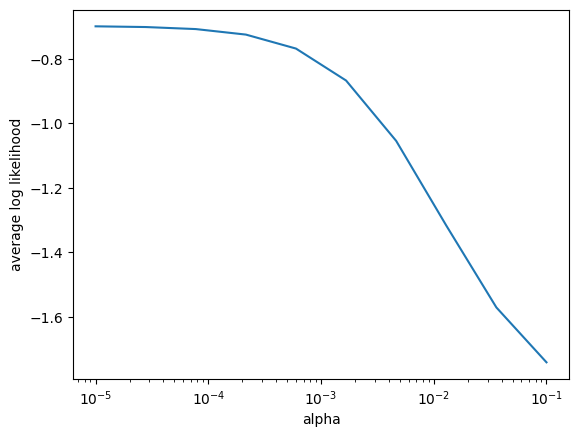

In [10]:
# vary the alpha parameter from 1e-5 to 1e-1 and plot the average log likelihood
alphas = np.logspace(-5, -1, 10)
loglikelihoods = []
for alpha in alphas:
    results = {}
    for reference, data in datasets.items():
        params = choix.lsr_top1(n_items, data, alpha=alpha)
        ll = choix.log_likelihood_top1(data, params)
        # average log likelihood by length of dataset
        ll /= len(data)
        results[reference] = {'params': params, 'loglikelihood': ll}
    loglikelihoods.append(np.mean([result['loglikelihood'] for result in results.values()]))

plt.plot(alphas, loglikelihoods)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('average log likelihood')
plt.show()


In [11]:
# write a function that given params and data, computes the accuracy of the model
# the accuracy for one data point is 1 - position/choice-set-length, where position is the position of the winning item in the choice set as per the params (beginning from 0)
def accuracy(params, data):
    acc = 0
    for winner, losers in data:
        choice_set = [winner] + losers
        choice_set.sort(key=lambda x: params[x], reverse=True)
        acc += 1 - choice_set.index(winner) / (len(choice_set) - 1)
    return acc / len(data)

# write a test function that tests the accuracy function
def test_accuracy():
    data = [[0, [1, 2, 3]], [1, [0, 2, 3]], [2, [0, 1, 3]], [3, [0, 1, 2]]]
    params = [0.1, 0.2, 0.3, 0.4]
    assert accuracy(params, data) == 0.5

# extend the above test function to take input parameter n and m and run the test with n items, m times, each time with a different random param vector
def test_accuracy(n=10, m=1000, val = None):
    acc = []
    for _ in range(m):
        data = [[0, list(np.arange(1, n))]]
        params = np.random.rand(n)
        if val is not None:
            params[0] = val
        acc.append(accuracy(params, data))
    print(np.mean(acc))

test_accuracy(val = 0.9)


0.9020000000000001


In [12]:
def penalty(params, data):
    pen = 0
    for winner, losers in data:
        choice_set = [winner] + losers
        choice_set.sort(key=lambda x: params[x], reverse=True)
        pen += choice_set.index(winner)
    return pen / len(data)

def test_penalty():
    data = [[0, [1, 2, 3]], [1, [0, 2, 3]], [2, [0, 1, 3]], [3, [0, 1, 2]]]
    params = [0.1, 0.2, 0.3, 0.4]
    print(penalty(params, data))

def test_penalty(n=10, m=1000, val = None):
    pen = []
    for _ in range(m):
        data = [[0, list(np.arange(1, n))]]
        params = np.random.rand(n)
        if val is not None:
            params[0] = val
        pen.append(penalty(params, data))
    print(np.mean(pen))
test_penalty(val = 0.5)

4.417


In [13]:
# for each dataset within datasets, split the dataset into training and test sets in a ratio of 90:10. Let datasets[reference] = [dataset, training_set, test_set]
split_datasets = dict()
for reference, data in datasets.items():
    np.random.shuffle(data)
    split = int(0.9 * len(data))
    split_datasets[reference] = [data, data[:split], data[split:]]

# rewrite the above code to also compute the accuracy and plot also the mean accuracy on the same plot as the average log likelihood but with a different y axis
alphas = np.logspace(-5, 3, 24)
loglikelihoods = []
train_accuracies = []
test_accuracies = []
for alpha in alphas:
    results = {}
    for reference, data in split_datasets.items():
        whole_data, training_data, test_data = data
        params = choix.lsr_top1(n_items, training_data, alpha=alpha)
        ll = choix.log_likelihood_top1(training_data, params)
        # average log likelihood by length of dataset
        ll /= len(training_data)
        train_acc = accuracy(params, training_data)
        test_acc = accuracy(params, test_data)
        results[reference] = {'params': params, 'loglikelihood': ll, 'training accuracy': train_acc, 'test accuracy': test_acc}
    loglikelihoods.append(np.mean([result['loglikelihood'] for result in results.values()]))
    train_accuracies.append(np.mean([result['training accuracy'] for result in results.values()]))
    test_accuracies.append(np.mean([result['test accuracy'] for result in results.values()]))

In [14]:
# extend the above to do k-fold cross validation
k = 10
alphas = np.logspace(-5, 3, 24)
loglikelihoods = []
train_accuracies = []
test_accuracies = []
for alpha in alphas:
    results = {}
    print(f"alpha: {alpha}")
    for reference, data in datasets.items():
        np.random.shuffle(data)
        split = int(len(data) / k)
        data_splits = [data[i:i+split] for i in range(0, len(data), split)]
        for i in range(k):
            training_data = [d for j, d in enumerate(data_splits) if j != i]
            training_data = [item for sublist in training_data for item in sublist]
            test_data = data_splits[i]
            params = choix.lsr_top1(n_items, training_data, alpha=alpha)
            ll = choix.log_likelihood_top1(training_data, params)
            # average log likelihood by length of dataset
            ll /= len(training_data)
            train_acc = accuracy(params, training_data)
            test_acc = accuracy(params, test_data)
            if reference not in results:
                results[reference] = {'loglikelihood': 0, 'training accuracy': 0, 'test accuracy': 0}
            results[reference]['loglikelihood'] += ll
            results[reference]['training accuracy'] += train_acc
            results[reference]['test accuracy'] += test_acc
    for reference in results:
        results[reference]['loglikelihood'] /= k
        results[reference]['training accuracy'] /= k
        results[reference]['test accuracy'] /= k
    loglikelihoods.append(np.mean([result['loglikelihood'] for result in results.values()]))
    train_accuracies.append(np.mean([result['training accuracy'] for result in results.values()]))
    test_accuracies.append(np.mean([result['test accuracy'] for result in results.values()]))

alpha: 1e-05
alpha: 2.2275429519995566e-05
alpha: 4.961947603002898e-05
alpha: 0.0001105295141126022
alpha: 0.00024620924014946254
alpha: 0.0005484416576121015
alpha: 0.0012216773489967918
alpha: 0.002721338768375309
alpha: 0.006061898993497572
alpha: 0.013503140378698722
alpha: 0.03007882518043099
alpha: 0.0670018750350959
alpha: 0.1492495545051829
alpha: 0.33245979322709385
alpha: 0.7405684692262442
alpha: 1.6496480740980206
alpha: 3.674661940736688
alpha: 8.18546730706902
alpha: 18.233480008684385
alpha: 40.615859883769794
alpha: 90.47357242349293
alpha: 201.5337685941731
alpha: 448.9251258218608
alpha: 1000.0


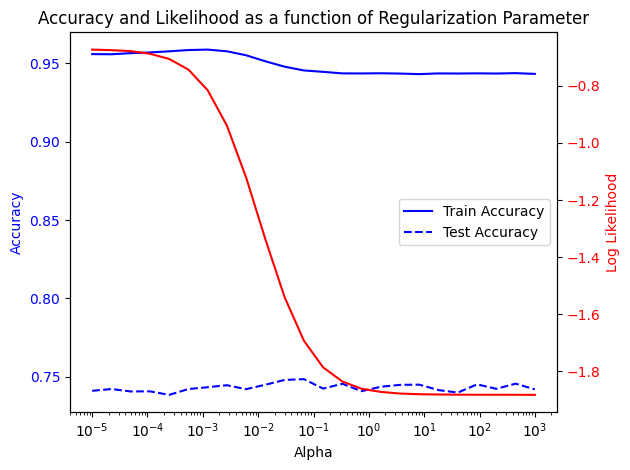

In [15]:

# plot the average log likelihood and the mean accuracy on the same plot but with different y axis
fig, ax1 = plt.subplots()
# Plot accuracy on the first y-axis
ax1.set_xlabel('Alpha')
ax1.set_xscale('log')
ax1.set_ylabel('Accuracy', color='blue')
ax1.plot(alphas, train_accuracies, color='blue', label='Train Accuracy')
#plot test accuracy on the same axis but with blue dashed line
ax1.plot(alphas, test_accuracies, color='blue', linestyle='dashed', label='Test Accuracy')
# ax1.plot(alphas, test_accuracies, color='green', label='Test Accuracy')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend()

# Create a second y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Log Likelihood', color='red')
ax2.plot(alphas, loglikelihoods, color='red', label='Likelihood')
ax2.tick_params(axis='y', labelcolor='red')

# Add a title and show the plot
plt.title('Accuracy and Likelihood as a function of Regularization Parameter')
fig.tight_layout()
plt.show()

In [17]:
from splitting_dataset import create_dataset
multi_df, single_dfs, size_map, _ = create_dataset()

In [18]:
multi_df.head()

,reference,selected,rest_0,rest_1,rest_2,rest_3,rest_4,rest_5,rest_6,rest_7,rest_8,rest_9,rest_10,rest_11,rest_12,rest_13,rest_14
1240,images/6c51e12ae05e4c6da6652cc51fa258b6.jpg,images/9d7d0a0057234bebbf0184080747dca9.jpg,images/214649bfd7ea489b8daf588e6fed45aa.jpg,images/6b896621045249d3a82d635d3f06e163.jpg,images/ca205931926143f0b0f4151971c58223.jpg,images/881563c360774decaba218f9680cbd85.jpg,images/a4ed300c0a094f7b9ec42459ffbbcc81.jpg,images/167766958abf4eb0b714dac6c16ae063.jpg,images/6bda47cc195845848ddc8cf659401fe8.jpg,images/c9ce7d5626b8412e88b24ca18dccd3ef.jpg,images/6013a7400334423599602f61c50f5106.jpg,images/9686cf9f9a6f4811a68eaa745afe845c.jpg,images/3fe2f1cdf0304a1dadfe8793bad6fcf9.jpg,NaN,NaN,NaN,NaN
1241,images/6c51e12ae05e4c6da6652cc51fa258b6.jpg,images/881563c360774decaba218f9680cbd85.jpg,images/9d7d0a0057234bebbf0184080747dca9.jpg,images/214649bfd7ea489b8daf588e6fed45aa.jpg,images/6b896621045249d3a82d635d3f06e163.jpg,images/ca205931926143f0b0f4151971c58223.jpg,images/a4ed300c0a094f7b9ec42459ffbbcc81.jpg,images/167766958abf4eb0b714dac6c16ae063.jpg,images/6bda47cc195845848ddc8cf659401fe8.jpg,images/c9ce7d5626b8412e88b24ca18dccd3ef.jpg,images/6013a7400334423599602f61c50f5106.jpg,images/9686cf9f9a6f4811a68eaa745afe845c.jpg,images/3fe2f1cdf0304a1dadfe8793bad6fcf9.jpg,NaN,NaN,NaN,NaN
1242,images/d0542b40890040b498a156b0b91bac40.jpg,images/8dcf0166aaee451096029975ea64e122.jpg,images/f851a062beb54e289e30f5c757af694a.jpg,images/881563c360774decaba218f9680cbd85.jpg,images/539ca34500924744bae0bcfbbf05c487.jpg,images/4307be60a4544f3391d3c4922ea8e04d.jpg,images/e0d83d9fe51a4e23bda6c4882c221376.jpg,images/4336d94e4c244e249b9e8f292f3cc348.jpg,images/a1563170f67048348bbeca0edc56427c.jpg,images/6b7b9f8560434be69227bf58a71bff46.jpg,images/94b0c36393c34b5d825c8a22900b5dfc.jpg,images/7c539af1de2342179d3f830f2cfa5cee.jpg,images/44b27ce7feeb4cb0b83f40d98adaa280.jpg,NaN,NaN,NaN,NaN
1243,images/d0542b40890040b498a156b0b91bac40.jpg,images/e0d83d9fe51a4e23bda6c4882c221376.jpg,images/f851a062beb54e289e30f5c757af694a.jpg,images/8dcf0166aaee451096029975ea64e122.jpg,images/881563c360774decaba218f9680cbd85.jpg,images/539ca34500924744bae0bcfbbf05c487.jpg,images/4307be60a4544f3391d3c4922ea8e04d.jpg,images/4336d94e4c244e249b9e8f292f3cc348.jpg,images/a1563170f67048348bbeca0edc56427c.jpg,images/6b7b9f8560434be69227bf58a71bff46.jpg,images/94b0c36393c34b5d825c8a22900b5dfc.jpg,images/7c539af1de2342179d3f830f2cfa5cee.jpg,images/44b27ce7feeb4cb0b83f40d98adaa280.jpg,NaN,NaN,NaN,NaN
1244,images/8dcf0166aaee451096029975ea64e122.jpg,images/b8afdb58120546959b531e198bab2653.jpg,images/9d7d0a0057234bebbf0184080747dca9.jpg,images/cd701a901dcf4e878d2886bafb1ead85.jpg,images/028869b776a14002b6b63c4387f59815.jpg,images/284fad712b9b41489de12a9d1ab4dbdf.jpg,images/881563c360774decaba218f9680cbd85.jpg,images/7ec5b1369b20402db6aa136f198c9a3a.jpg,images/f90e27cfb8bc46d59eae5e123d68a28a.jpg,images/b958b434bd144a09a9b1415dcdb49864.jpg,images/4307be60a4544f3391d3c4922ea8e04d.jpg,images/d0d0d17b7bd849d4a7aeb9fccfc2c8cc.jpg,images/12f6787b3c24466bb149604f1ca00866.jpg,NaN,NaN,NaN,NaN


In [20]:
# see which of the single_dfs do we want to keep in training and which in test
sizes = [2, 4, 8, 12, 16]
training_percentage = {2: 0.9, 4: 0.9, 8: 0.9, 12: 0.9, 16: 0.9}
datasets = {}

for reference in multi_df['reference'].unique():
    training_data = []
    validation_data_seq = dict()
    test_data_seq = dict()
    for i, row in multi_df[multi_df['reference']==reference].iterrows():
        winning_item = item_to_id(row['selected'], reference)
        losing_items = list([item_to_id(item, reference) for item in row.drop(['selected', 'reference']) if not pd.isna(item)])
        training_data.append([winning_item, losing_items])
    for size, fraction in training_percentage.items():
        single_df = single_dfs[size]
        validation_data = []
        test_data = []
        for i, row in single_df[single_df['reference']==reference].iterrows():
            winning_item = item_to_id(row['selected'], reference)
            losing_items = list([item_to_id(item, reference) for item in row.drop(['selected', 'reference']) if not pd.isna(item)])
            if np.random.rand() < fraction:
                validation_data.append([winning_item, losing_items])
                training_data.append([winning_item, losing_items])
            else:
                test_data.append([winning_item, losing_items])
        validation_data_seq[size] = validation_data
        test_data_seq[size] = test_data
    datasets[item_to_id(reference)] = (training_data, validation_data_seq, test_data_seq)

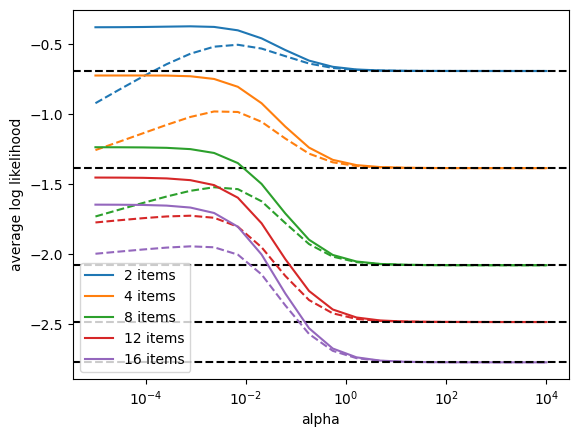

In [21]:
alphas = np.logspace(-5, 4, 20)
val_loglikelihoods = dict()
test_loglikelihoods = dict()
for alpha in alphas:
    results = {'val': dict(), 'test': dict()}
    for reference, data in datasets.items():
        training_data, validation_data_seq, test_data_seq = data
        params = choix.lsr_top1(n_items, training_data, alpha=alpha)
        val_ll = dict()
        test_ll = dict()
        for size in sizes:
            validation_data = validation_data_seq[size]
            test_data = test_data_seq[size]
            val_ll[size] = choix.log_likelihood_top1(validation_data, params)/len(validation_data)
            if len(test_data) > 0:
                test_ll[size] = choix.log_likelihood_top1(test_data, params)/len(test_data)
            else:
                test_ll[size] = np.nan
        results['val'][reference] = val_ll
        results['test'][reference] = test_ll
    for size in sizes:
        if size not in val_loglikelihoods:
            val_loglikelihoods[size] = []
        val_loglikelihoods[size].append(np.mean([result[size] for result in results['val'].values()]))
        if size not in test_loglikelihoods:
            test_loglikelihoods[size] = []
        test_loglikelihoods[size].append(np.nanmean([result[size] for result in results['test'].values()]))

plt.figure()
# get color cycle
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
for i, size in enumerate(sizes):
    plt.plot(alphas, val_loglikelihoods[size], label=f'{size} items', color=colors[i])
    plt.plot(alphas, test_loglikelihoods[size], color=colors[i], linestyle='dashed')
    # plot a horizontal line at -log(size)
    plt.axhline(-np.log(size), color='black', linestyle='dashed')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('average log likelihood')
plt.legend()
plt.show()

In [22]:
multi_data = []
single_data_all = dict()
sizes = [2, 4, 8, 12, 16]
size_map = {2: 4, 4: 3, 8: 2, 12: 1, 16: 0}


In [23]:
len(multi_data), {size: len(data) for size, data in single_data_all.items()}

(0, {})

In [26]:
k = 10 # number of folds
alphas = np.logspace(-5, 4, 20)
sizes = [2, 4, 8, 12, 16]
split_size = dict()
results = np.zeros((2, 2, len(sizes), len(alphas)))# first dimension is accuracy and loglikelihood, second is validation and test
for reference in tqdm(multi_df['reference'].unique()):
    # basic data preparation
    multi_data = []
    single_data_all = dict()    
    for i, row in multi_df[multi_df['reference']==reference].iterrows():
        winning_item = item_to_id(row['selected'], reference)
        losing_items = list([item_to_id(item, reference) for item in row.drop(['selected', 'reference']) if not pd.isna(item)])
        multi_data.append([winning_item, losing_items])
    for size in sizes:
        single_df = single_dfs[size]
        single_data = []
        for i, row in single_df[single_df['reference']==reference].iterrows():
            winning_item = item_to_id(row['selected'], reference)
            losing_items = list([item_to_id(item, reference) for item in row.drop(['selected', 'reference']) if not pd.isna(item)])
            single_data.append([winning_item, losing_items])
        single_data_all[size] = single_data
        split_size[size] = int(len(single_data) / k)
    # k-fold cross validation data preparation
    for i in range(k):
        validation_data = dict()
        test_data = dict()
        training_data = multi_data.copy()
        for size in sizes:
            single_data = single_data_all[size]
            split = split_size[size]
            test_data[size] = single_data[i*split:(i+1)*split]
            validation_data[size] = single_data[:i*split] + single_data[(i+1)*split:]
            training_data += validation_data[size].copy()
            # print(len(training_data), len(validation_data[size]), len(test_data[size]))
        for j, alpha in enumerate(alphas):
            params = choix.lsr_top1(n_items, training_data, alpha=alpha)        # fitting the model to the data
            for l, size in enumerate(sizes):
                val_ll = choix.log_likelihood_top1(validation_data[size], params) / len(validation_data[size])
                test_ll = choix.log_likelihood_top1(test_data[size], params) / len(test_data[size])
                results[0, 0, l, j] += penalty(params, validation_data[size])
                results[0, 1, l, j] += penalty(params, test_data[size])
                results[1, 0, l, j] += val_ll
                results[1, 1, l, j] += test_ll
results /= (k*len(multi_df['reference'].unique()))


100%|██████████| 100/100 [00:41<00:00,  2.41it/s]


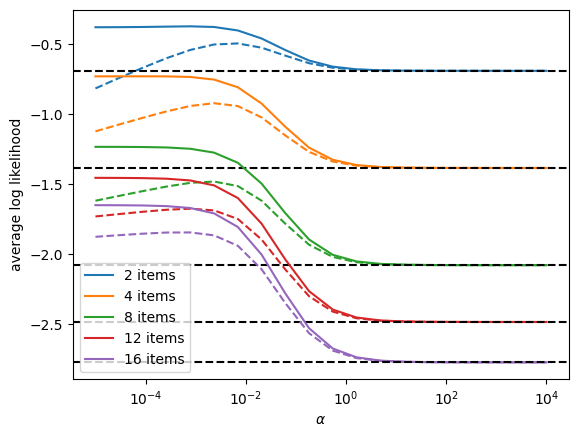

In [27]:
plt.figure()
# get color cycle
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
for i, size in enumerate(sizes):
    plt.plot(alphas, results[1, 0, i], label=f'{size} items', color=colors[i])
    plt.plot(alphas, results[1, 1, i], color=colors[i], linestyle='dashed')
    # plot a horizontal line at -log(size)
    plt.axhline(-np.log(size), color='black', linestyle='dashed')
plt.xscale('log')
plt.xlabel('$\\alpha$')
plt.ylabel('average log likelihood')
plt.legend()
plt.show()

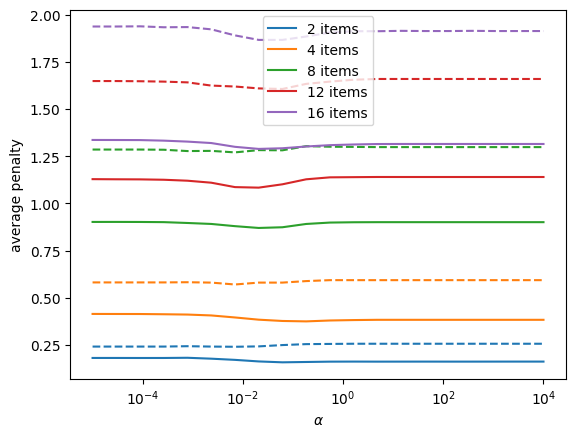

In [28]:
plt.figure()
# get color cycle
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
for i, size in enumerate(sizes):
    plt.plot(alphas, results[0, 0, i], label=f'{size} items', color=colors[i])
    plt.plot(alphas, results[0, 1, i], color=colors[i], linestyle='dashed')
plt.xscale('log')
plt.xlabel('$\\alpha$')
plt.ylabel('average penalty')
plt.legend()
plt.show()